# Flood Risk Prediction

## Step 1: Import Libraries

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

## Step 2: Load the Dataset

In [2]:
df=pd.read_csv('flood.csv')
df.head(10)

,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,Encroachments,...,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability
0,3,8,6,6,4,4,6,2,3,2,...,10,7,4,2,3,4,3,2,6,0.450
1,8,4,5,7,7,9,1,5,5,4,...,9,2,6,2,1,1,9,1,3,0.475
2,3,10,4,1,7,5,4,7,4,9,...,7,4,4,8,6,1,8,3,6,0.515
3,4,4,2,7,3,4,1,4,6,4,...,4,2,6,6,8,8,6,6,10,0.520
4,3,7,5,2,5,8,5,2,7,5,...,7,6,5,3,3,4,4,3,4,0.475
5,6,6,6,4,6,4,3,1,3,5,...,10,5,9,5,5,7,3,3,2,0.470
6,6,7,4,5,5,5,4,8,8,4,...,8,4,5,4,7,7,5,4,8,0.570
7,7,3,5,5,6,6,6,7,6,5,...,4,6,9,7,10,6,5,4,5,0.585
8,6,3,5,4,5,11,3,2,9,7,...,2,8,7,5,4,9,6,5,7,0.580
9,4,3,5,6,2,3,7,7,10,4,...,7,6,5,6,7,5,7,4,8,0.555


## Step 3: Preprocess Data

In [3]:
print(df.isnull().sum())
df.dropna(inplace=True) 
df.info() 

MonsoonIntensity                   0
TopographyDrainage                 0
RiverManagement                    0
Deforestation                      0
Urbanization                       0
ClimateChange                      0
DamsQuality                        0
Siltation                          0
AgriculturalPractices              0
Encroachments                      0
IneffectiveDisasterPreparedness    0
DrainageSystems                    0
CoastalVulnerability               0
Landslides                         0
Watersheds                         0
DeterioratingInfrastructure        0
PopulationScore                    0
WetlandLoss                        0
InadequatePlanning                 0
PoliticalFactors                   0
FloodProbability                   0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           -

In [4]:
print(df.columns)

Index(['MonsoonIntensity', 'TopographyDrainage', 'RiverManagement',
       'Deforestation', 'Urbanization', 'ClimateChange', 'DamsQuality',
       'Siltation', 'AgriculturalPractices', 'Encroachments',
       'IneffectiveDisasterPreparedness', 'DrainageSystems',
       'CoastalVulnerability', 'Landslides', 'Watersheds',
       'DeterioratingInfrastructure', 'PopulationScore', 'WetlandLoss',
       'InadequatePlanning', 'PoliticalFactors', 'FloodProbability'],
      dtype='object')


## Step 4: Exploratory Data Analysis(EDA)

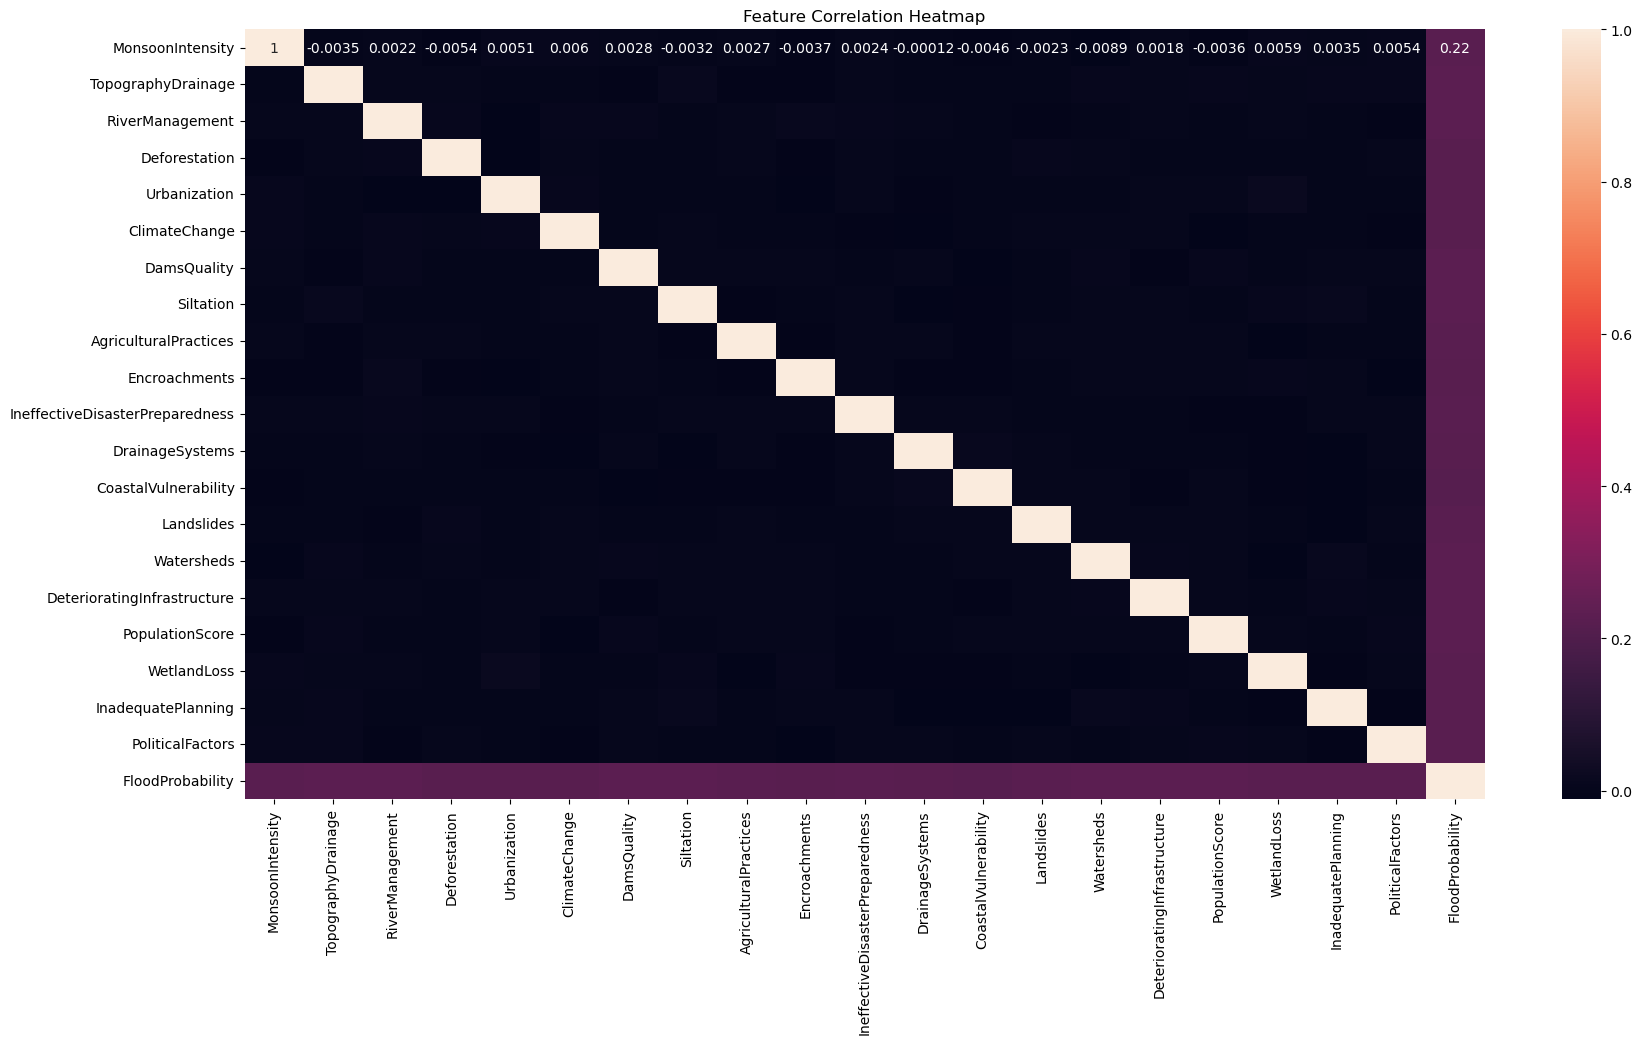

In [5]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True)
plt.title("Feature Correlation Heatmap")
plt.show()

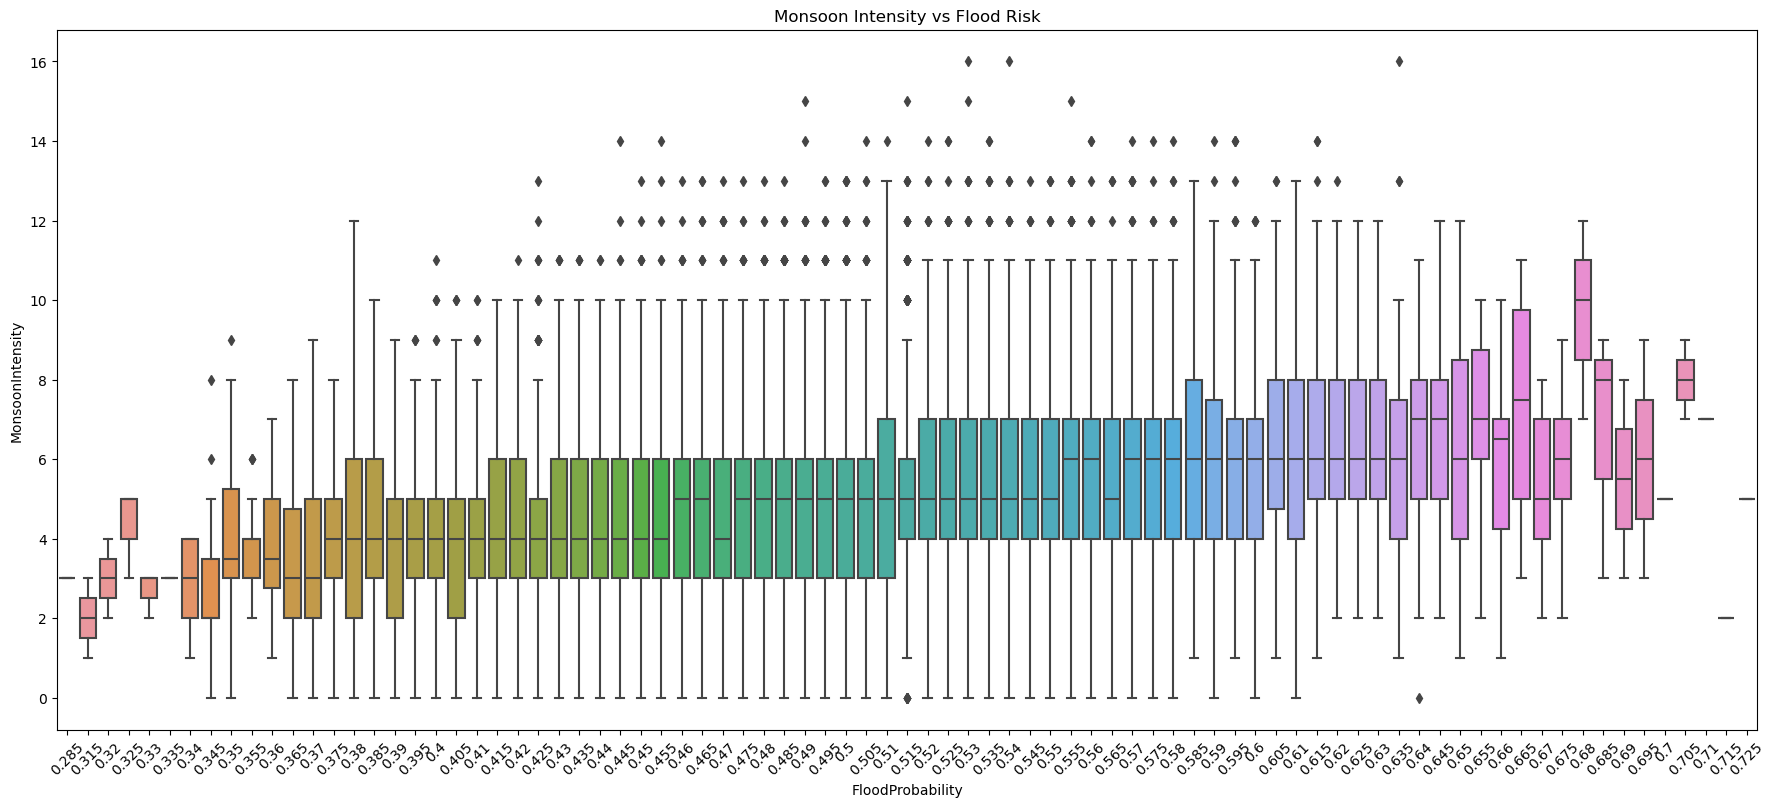

In [6]:
plt.figure(figsize=(20,10))
sns.boxplot(x='FloodProbability',y='MonsoonIntensity',data=df)
plt.xticks(rotation=45)
plt.subplots_adjust(bottom=0.2,left=0.1,right=0.95,top=0.9,wspace=0.5)
plt.title("Monsoon Intensity vs Flood Risk")
plt.show()

## Step 5: Feature Selection and Split

In [7]:
X=df[['MonsoonIntensity', 'RiverManagement', 'ClimateChange', 'DrainageSystems']]
Y=df['FloodProbability']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

## Step 6: Train ML Model

In [8]:
model = RandomForestRegressor(n_estimators=100,max_depth=20, random_state=42)
model.fit(X_train, Y_train)

RandomForestRegressor(max_depth=20, random_state=42)

## Step 7: Evaluate the Model

In [9]:
Y_pred= model.predict(X_test)

print("Mean Squared Error: ")
print(mean_squared_error(Y_test, Y_pred))

print("\nR2 Score: ")
print(r2_score(Y_test, Y_pred))

Mean Squared Error: 
0.0022939174566995292

R2 Score: 
0.07896467228401993


## Step 8: Predict New Data

In [10]:
feature_names= X_train.columns
sample_data=pd.DataFrame([[120.5,29.3,68.2,4.5]], columns=feature_names)
print("Predicted: ",model.predict(sample_data))

Predicted:  [0.5925]


## Step 9: Save the Model

In [12]:
import joblib
joblib.dump(model, 'flood_model.pkl')

['flood_model.pkl']